Happy Customer

In [45]:
# Install the required libraries
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import LabelEncoder
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn import metrics
#from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.tree import DecisionTreeRegressor
#import plotly.express as px
#from sklearn.linear_model import LogisticRegression
#from pandas import DataFrame
#from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier

Data gathering and preprocessing:

In [46]:
# Importing data
df = pd.read_csv("ACME-HappinessSurvey2020.csv")
df.shape

(126, 7)

In [47]:
df.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


/tmp/ipykernel_74302/2421662377.py:5: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  number_of_classes = pd.value_counts(df['Y'], sort = True)


Y
1    54.761905
0    45.238095
Name: count, dtype: float64


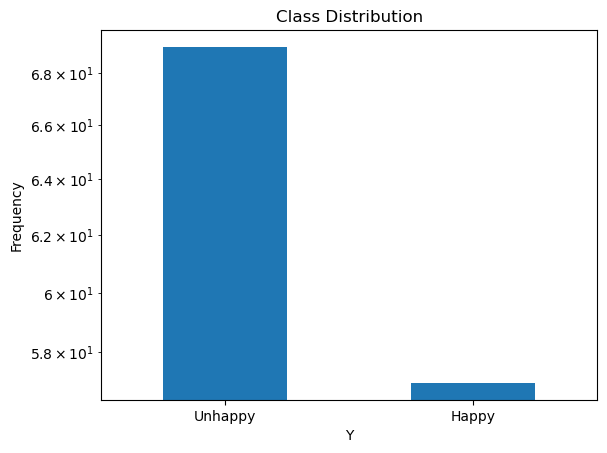

In [48]:
# Verifying the partition of classes 0 and 1 
LABELS = ["Unhappy", "Happy"]

# Number of transactions in each class
number_of_classes = pd.value_counts(df['Y'], sort = True)

# Percentage of each class
percent_class = 100*number_of_classes/df.shape[0]
print(percent_class)

# Showing the distribution of each class using a log-scale 
number_of_classes.plot(kind = 'bar',rot=0)
plt.title("Class Distribution")
plt.xticks(range(len(number_of_classes)), LABELS)
plt.xlabel("Y")
plt.ylabel("Frequency");
plt.yscale('log')


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [50]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [51]:
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [52]:
df.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

feature selection : correlation values between target and features

In [53]:
# Compute correlation with 'Churn'
correlation = df.corr()['Y'].sort_values()



In [54]:
# Drop the 'Churn' correlation (as it'll be 1 with itself)
correlation = correlation.drop('Y', errors='ignore')

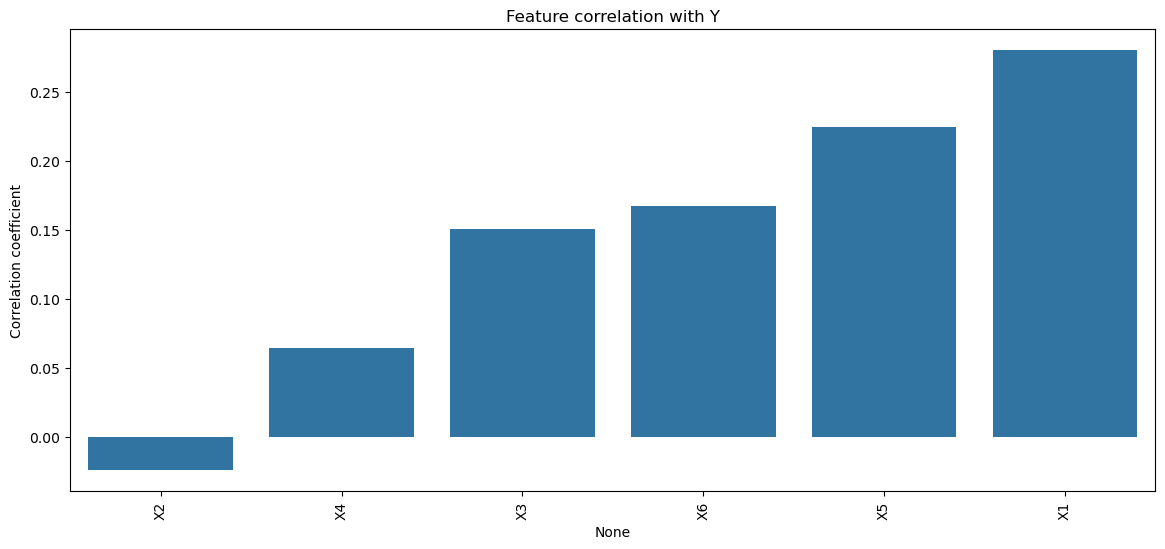

In [55]:
# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(x=correlation.index, y=correlation.values)
plt.xticks(rotation=90)
plt.title('Feature correlation with Y')
plt.ylabel('Correlation coefficient')
plt.show()

Selecting features with correlation above a threshold

In [56]:
threshold = 0.15  # example threshold
selected_features = correlation[correlation.abs() > threshold]
print("Selected Features:", selected_features.index.tolist())

Selected Features: ['X3', 'X6', 'X5', 'X1']


In [57]:
#List of features you want to select
selected_features = ['X3', 'X6', 'X5', 'X1']
#selected_features = ['X5', 'X1']

In [58]:
# Split dataset into X (variables) and y (target)
y = df["Y"]
X = df[selected_features]

X.shape, y.shape

((126, 4), (126,))

Modeling

In [59]:
# Split data into training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

len(X_train), len(X_test)

(100, 26)

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
from sklearn.model_selection import GridSearchCV
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}

# Initialize the RandomForest
rfc = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid,
                           cv=5, verbose=1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Now you can evaluate the best model on your test set
accuracy = best_estimator.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test Set Accuracy: 0.6923076923076923


In [62]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

model = make_pipeline( 
    RandomForestClassifier(max_depth = 30, min_samples_leaf = 4, min_samples_split =  2, n_estimators =  100 )
)
model.fit(X_train, y_train)

Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=30, min_samples_leaf=4))])

In [63]:
y_pred = model.predict(X_test)
#y_pred

In [64]:
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1])

In [65]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.7692307692307693

In [66]:
import pickle

pickle.dump(model , open('Customer-happy-clf.pkl' , 'wb'))